/opt/conda/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


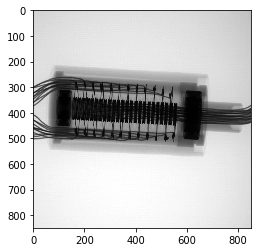

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte
from skimage.io import imread
from skimage.filters import rank, gaussian, median, roberts, sobel, prewitt, laplace
from skimage.morphology import square
from skimage.util import random_noise
from skimage.feature import blob_log

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy as np

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

image = img_as_ubyte(imread('https://www.eledus.cz/wp-content/uploads/2017/05/RTG-Krou%C5%BEkostroj.jpg', as_grey=True))
plt.imshow(image)

## Mean filter
Move slider to change size of the pixel neighbour

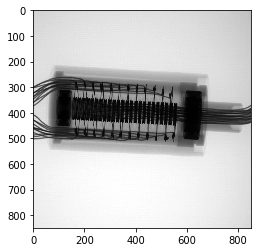

interactive(children=(IntSlider(value=1, continuous_update=False, description='neigh', max=30, min=1), Output()), _dom_classes=('widget-interact',))

In [81]:
plt.imshow(image)

mean_slider = widgets.IntSlider(min=1,max=30,step=1,value=1, continuous_update=False)

@interact(neigh=mean_slider)
def mean_display(neigh):
    plt.imshow(rank.mean(image, selem=square(neigh)))

## Gaussian filter
Move slider to change sigma

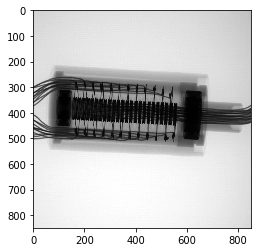

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='sigma', max=10.0, min=0.1), Output()), _dom_classes=('widget-interact',))

In [82]:
plt.imshow(image)

gaussian_slider = widgets.FloatSlider(min=0.1,max=10,step=0.1,value=0.1,continuous_update=False);

@interact(sigma=gaussian_slider)
def gaussian_display(sigma):
    plt.imshow(gaussian(image, sigma))

## Median filter
Move sliders to apply median filter and noise on original image

In [103]:
noise_slider = widgets.FloatSlider(min=0.0,max=1,step=0.05,value=0.1,continuous_update=False)
median_slider = widgets.IntSlider(min=1,max=10,step=1,value=1,continuous_update=False)

@interact(noise_level=noise_slider)
def noise_display(noise_level):
    noised_image = random_noise(image, amount=noise_level, mode='s&p')
    plt.imshow(noised_image)
    
    @interact(neigh=median_slider)
    def median_display(neigh):
        plt.imshow(median(noised_image, selem=square(neigh)))


interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='noise_level', max=1.0, step=0.05), Output()), _dom_classes=('widget-interact',))

# Edge detection methods

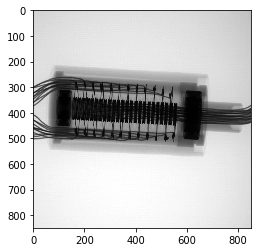

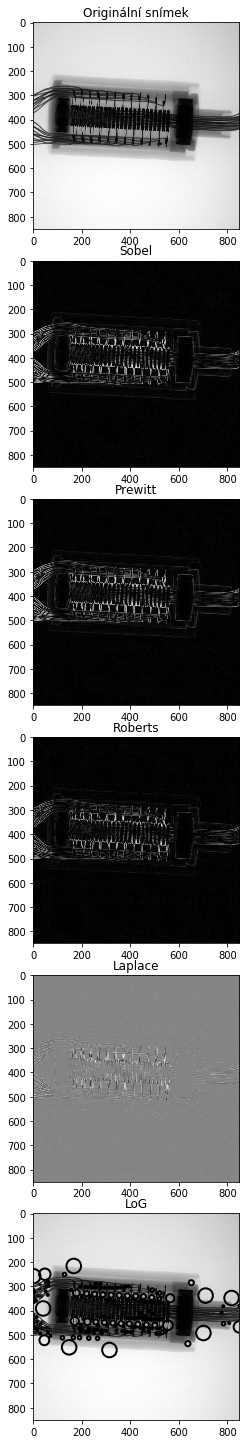

In [126]:
plt.imshow(image)
f, ax = plt.subplots(6, 1, figsize=(20,20))
f.tight_layout()
ax[0].imshow(image)
ax[0].set_title('Originální snímek')

ax[1].imshow(sobel(image))
ax[1].set_title('Sobel')

ax[2].imshow(prewitt(image))
ax[2].set_title('Prewitt')

ax[3].imshow(roberts(image))
ax[3].set_title('Roberts')

ax[4].imshow(laplace(image))
ax[4].set_title('Laplace')